Loan Approval Rate by Gender:
gender
Female    0.0
Male      1.0
Name: loan_approved, dtype: float64


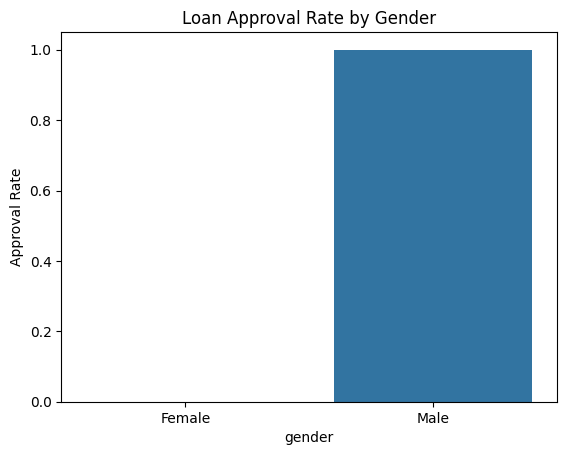

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data
data = {
    'gender': ['Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Female', 'Male'],
    'income': [50000, 45000, 60000, 42000, 70000, 40000, 41000, 52000],
    'loan_approved': [1, 0, 1, 0, 1, 0, 0, 1]
}

df = pd.DataFrame(data)

# Check approval rate by gender
approval_by_gender = df.groupby('gender')['loan_approved'].mean()
print("Loan Approval Rate by Gender:")
print(approval_by_gender)

# Visualize the bias
sns.barplot(x=approval_by_gender.index, y=approval_by_gender.values)
plt.ylabel('Approval Rate')
plt.title('Loan Approval Rate by Gender')
plt.show()


In [ ]:
# Step 1: Import Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 2: Load Dataset (from UCI or local copy)
# You can download from https://archive.ics.uci.edu/ml/datasets/adult
column_names = [
    'age', 'workclass', 'fnlwgt', 'education', 'education-num',
    'marital-status', 'occupation', 'relationship', 'race', 'sex',
    'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income'
]

# Load data (use local CSV if available)
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data',
                 names=column_names, header=None, na_values=' ?', skipinitialspace=True)

# Step 3: Preview Data
df.head()


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
# clean missing values
# Remove rows with missing values
df.dropna(inplace=True)


income     <=50K      >50K
sex                       
Female  0.890539  0.109461
Male    0.694263  0.305737


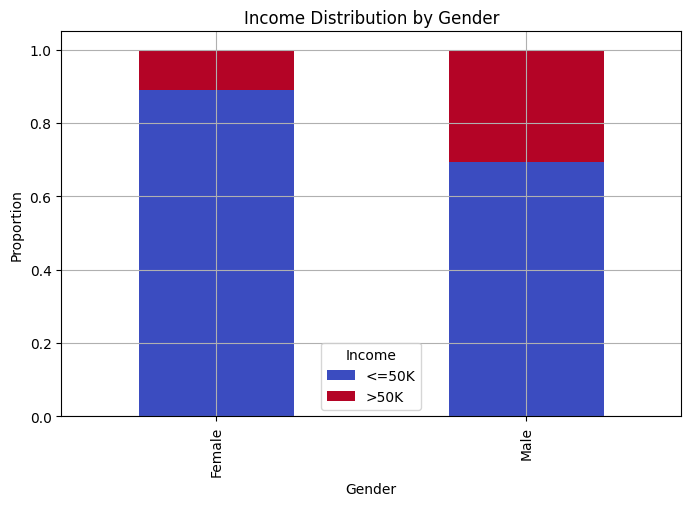

In [ ]:
# analyze income distribution by gender
# Group by sex and calculate high-income proportion
income_by_gender = pd.crosstab(df['sex'], df['income'], normalize='index')

# Display the proportion
print(income_by_gender)

# Step 6: Plot the result
income_by_gender.plot(kind='bar', stacked=True, figsize=(8, 5), colormap='coolwarm')
plt.title('Income Distribution by Gender')
plt.ylabel('Proportion')
plt.xlabel('Gender')
plt.legend(title='Income')
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd

# Load your dataset as df
# Check gender distribution
print(df['sex'].value_counts())

# Check income distribution by gender
print(pd.crosstab(df['sex'], df['income']))


sex
Male      21790
Female    10771
Name: count, dtype: int64
income  <=50K  >50K
sex                
Female   9592  1179
Male    15128  6662


In [ ]:
# apply undersampling to balance dataset
# Separate male and female rows
df_male = df[df['sex'] == 'Male']
df_female = df[df['sex'] == 'Female']

# Undersample male rows to match female count
df_male_sampled = df_male.sample(n=len(df_female), random_state=42)

# Combine male and female to get a balanced dataset
df_balanced = pd.concat([df_male_sampled, df_female])

# Shuffle the combined dataset
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# Check balance
print(df_balanced['sex'].value_counts())
print(pd.crosstab(df_balanced['sex'], df_balanced['income']))


sex
Male      10771
Female    10771
Name: count, dtype: int64
income  <=50K  >50K
sex                
Female   9592  1179
Male     7538  3233


income     <=50K      >50K
sex                       
Female  0.890539  0.109461
Male    0.699842  0.300158


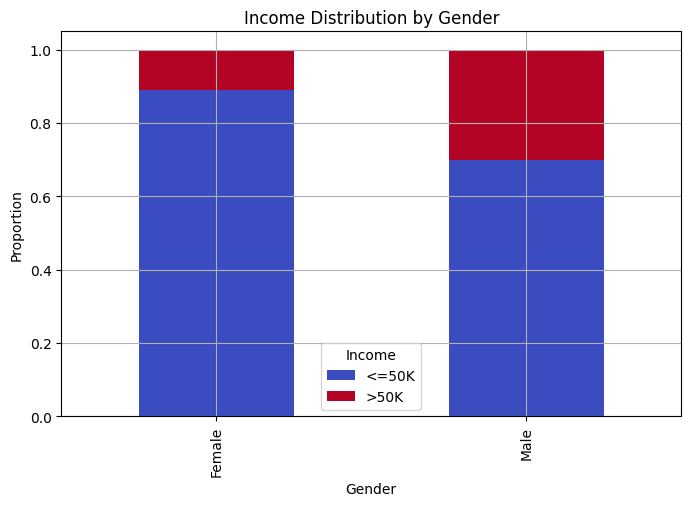

In [ ]:
# analyze income distribution by gender
# Group by sex and calculate high-income proportion
income_by_gender = pd.crosstab(df_balanced['sex'], df_balanced['income'], normalize='index')

# Display the proportion
print(income_by_gender)

# Step 6: Plot the result
income_by_gender.plot(kind='bar', stacked=True, figsize=(8, 5), colormap='coolwarm')
plt.title('Income Distribution by Gender')
plt.ylabel('Proportion')
plt.xlabel('Gender')
plt.legend(title='Income')
plt.grid(True)
plt.show()


Start form begning


In [ ]:
import pandas as pd

# Load the dataset (assuming you've already cleaned it)
column_names = [
    'age', 'workclass', 'fnlwgt', 'education', 'education-num',
    'marital-status', 'occupation', 'relationship', 'race', 'sex',
    'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income'
]

df = pd.read_csv(
    'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data',
    names=column_names,
    na_values=' ?',
    skipinitialspace=True
)

df.dropna(inplace=True)

# Check original income distribution by gender
print(pd.crosstab(df['sex'], df['income']))


income  <=50K  >50K
sex                
Female   9592  1179
Male    15128  6662


In [ ]:
# Separate by gender and income class
male_gt50k = df[(df['sex'] == 'Male') & (df['income'] == '>50K')]
male_lte50k = df[(df['sex'] == 'Male') & (df['income'] == '<=50K')]
female_gt50k = df[(df['sex'] == 'Female') & (df['income'] == '>50K')]
female_lte50k = df[(df['sex'] == 'Female') & (df['income'] == '<=50K')]

# Find minimum count among all groups
min_count = min(len(male_gt50k), len(male_lte50k), len(female_gt50k), len(female_lte50k))
print("Each group will have:", min_count)

# Undersample all groups to match the smallest group size
male_gt50k_bal = male_gt50k.sample(n=min_count, random_state=42)
male_lte50k_bal = male_lte50k.sample(n=min_count, random_state=42)
female_gt50k_bal = female_gt50k.sample(n=min_count, random_state=42)
female_lte50k_bal = female_lte50k.sample(n=min_count, random_state=42)

# Combine all balanced groups
df_balanced = pd.concat([male_gt50k_bal, male_lte50k_bal, female_gt50k_bal, female_lte50k_bal])
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# Check new distribution
print(pd.crosstab(df_balanced['sex'], df_balanced['income']))


Each group will have: 1179
income  <=50K  >50K
sex                
Female   1179  1179
Male     1179  1179


income  <=50K  >50K
sex                
Female    0.5   0.5
Male      0.5   0.5


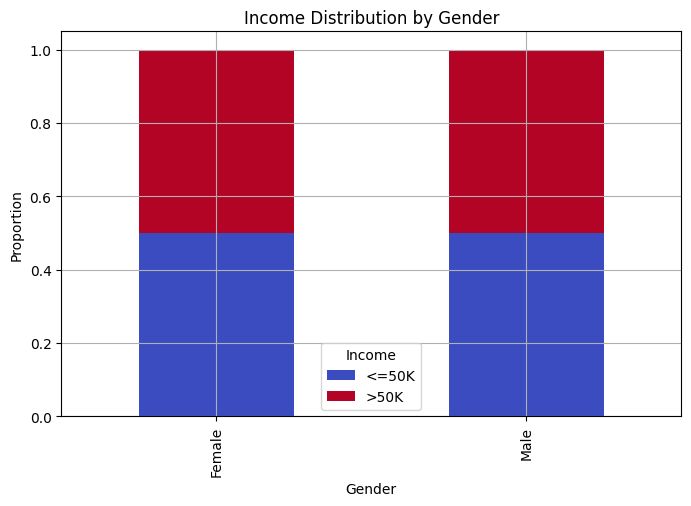

In [ ]:
# analyze income distribution by gender
# Group by sex and calculate high-income proportion
income_by_gender = pd.crosstab(df_balanced['sex'], df_balanced['income'], normalize='index')

# Display the proportion
print(income_by_gender)

# Step 6: Plot the result
income_by_gender.plot(kind='bar', stacked=True, figsize=(8, 5), colormap='coolwarm')
plt.title('Income Distribution by Gender')
plt.ylabel('Proportion')
plt.xlabel('Gender')
plt.legend(title='Income')
plt.grid(True)
plt.show()


In [ ]:
# Encode target and features
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Encode categorical variables
df_encoded = df_balanced.copy()
label_encoders = {}

for col in df_encoded.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le

# Features and target
X = df_encoded.drop('income', axis=1)
y = df_encoded['income']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
X_test.head()


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,y_true,y_pred
1210,40,3,439919,6,5,2,7,0,4,Male,0,0,40,25,0,0
2029,38,3,258888,15,10,2,1,5,4,Female,0,0,35,38,1,0
3192,39,3,85319,14,15,2,10,5,4,Female,7688,0,60,38,1,1
3725,35,3,216711,11,9,2,3,0,4,Male,0,0,40,38,1,0
2256,55,5,477867,9,13,2,4,0,4,Male,0,0,40,38,1,1


In [ ]:
# Add back 'sex' column to test set for group-wise evaluation
X_test['sex'] = df_balanced.loc[X_test.index, 'sex']
X_test['y_true'] = y_test
X_test['y_pred'] = y_pred

# Decode sex back to labels
# X_test['sex'] = label_encoders['sex'].inverse_transform(X_test['sex'])

# Group by gender
male_data = X_test[X_test['sex'] == 'Male']
female_data = X_test[X_test['sex'] == 'Female']

# Calculate metrics
def group_metrics(group, label="Group"):
    total = len(group)
    positive_rate = sum(group['y_pred']) / total
    true_positive = ((group['y_pred'] == 1) & (group['y_true'] == 1)).sum()
    tp_rate = true_positive / (group['y_true'] == 1).sum()
    acc = (group['y_true'] == group['y_pred']).mean()

    print(f"\n🔎 Metrics for {label}:")
    print(f"Total: {total}")
    print(f"Positive Prediction Rate: {positive_rate:.2f}")
    print(f"True Positive Rate (Recall): {tp_rate:.2f}")
    print(f"Accuracy: {acc:.2f}")

# Evaluate both groups
group_metrics(male_data, "Male")
group_metrics(female_data, "Female")



🔎 Metrics for Male:
Total: 699
Positive Prediction Rate: 0.45
True Positive Rate (Recall): 0.68
Accuracy: 0.73

🔎 Metrics for Female:
Total: 716
Positive Prediction Rate: 0.52
True Positive Rate (Recall): 0.72
Accuracy: 0.70


In [ ]:
pip install fairlearn

In [ ]:
# complete code
# load and preperocess
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns

# Load dataset
df = pd.read_csv(
    'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data',
    names=column_names,
    na_values=' ?',
    skipinitialspace=True
)

# Drop rows with missing values
df.dropna(inplace=True)

# Encode target
df['income'] = df['income'].map({'<=50K': 0, '>50K': 1})

# Encode categorical columns
label_encoders = {}
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Define features and target
X = df.drop('income', axis=1)
y = df['income']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.8616612927990174


In [ ]:
# bias check with fairlearn
from fairlearn.metrics import MetricFrame, selection_rate, false_positive_rate, true_positive_rate

# Sensitive feature: Sex (usually column 9 or 10)
sensitive_feature = X_test['sex']  # 0=Female, 1=Male (based on label encoding)

# Create fairness metric frame
metrics = {
    "accuracy": accuracy_score,
    "selection_rate": selection_rate,
    "false_positive_rate": false_positive_rate,
    "true_positive_rate": true_positive_rate
}

fair_metrics = MetricFrame(
    metrics=metrics,
    y_true=y_test,
    y_pred=y_pred,
    sensitive_features=sensitive_feature
)

# View results
print("Fairness metrics by gender:\n")
print(fair_metrics.by_group)


Fairness metrics by gender:

     accuracy  selection_rate  false_positive_rate  true_positive_rate
sex                                                                   
0    0.927093        0.076199             0.022187            0.515021
1    0.829952        0.266697             0.094785            0.658445


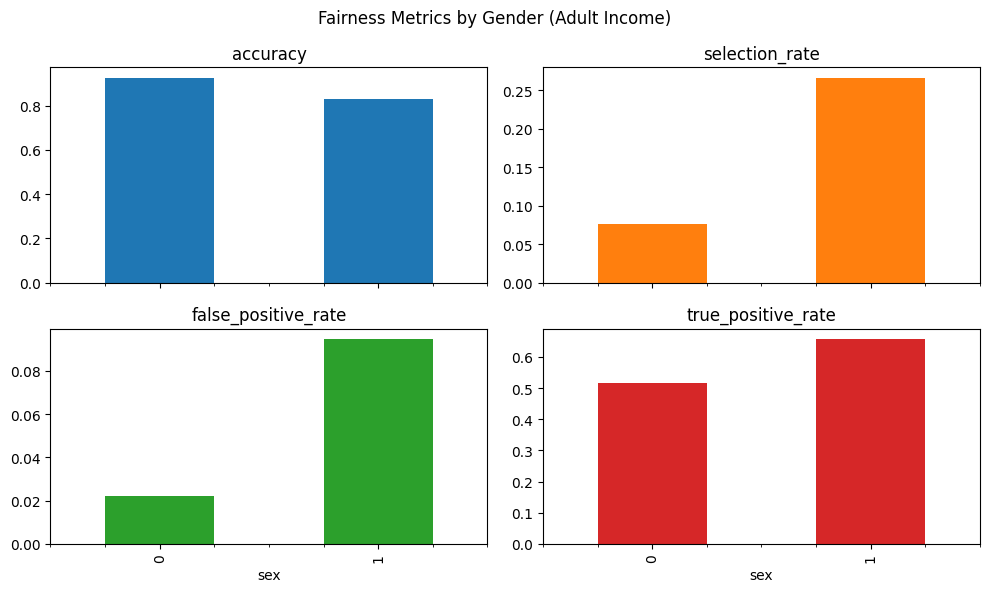

In [ ]:
import matplotlib.pyplot as plt

fair_metrics.by_group.plot.bar(
    subplots=True,
    layout=(2, 2),
    figsize=(10, 6),
    legend=False,
    title="Fairness Metrics by Gender (Adult Income)"
)
plt.tight_layout()
plt.show()
